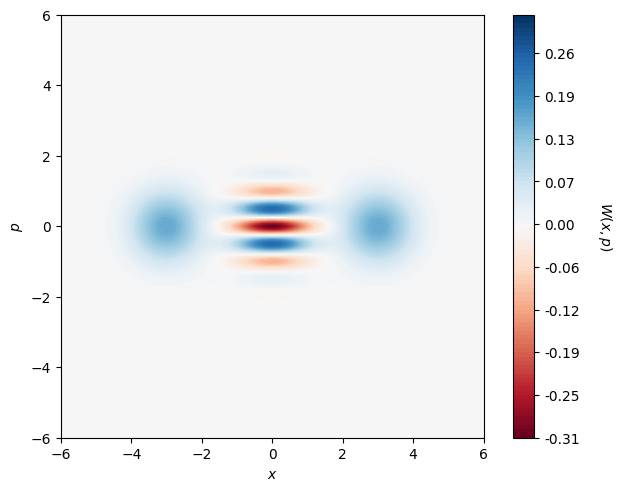

qumodes:  1  qubits:  1     with amplitude: 0.316 - i0.000 (big endian)
qumodes:  3  qubits:  1     with amplitude: 0.581 - i0.000 (big endian)
qumodes:  5  qubits:  1     with amplitude: 0.585 - i0.000 (big endian)
qumodes:  7  qubits:  1     with amplitude: 0.406 - i0.000 (big endian)
qumodes:  9  qubits:  1     with amplitude: 0.215 - i0.000 (big endian)
qumodes:  11  qubits:  1     with amplitude: 0.092 - i0.000 (big endian)
qumodes:  13  qubits:  1     with amplitude: 0.034 - i0.000 (big endian)
qumodes:  15  qubits:  1     with amplitude: 0.013 - i0.000 (big endian)


([[4.502175133982774], [1.0000000000000002]],
 [[[1], [1], (0.31619816194196726-1.936155334592533e-17j)],
  [[3], [1], (0.5808931168322355-3.556944480876634e-17j)],
  [[5], [1], (0.5845124599996477-3.5791065660015697e-17j)],
  [[7], [1], (0.4058657783427802-2.4852111316546748e-17j)],
  [[9], [1], (0.21525262264413592-1.3180421766460708e-17j)],
  [[11], [1], (0.09244444123780583-5.660589453042225e-18j)],
  [[13], [1], (0.03387310011516013-2.0741291816614347e-18j)],
  [[15], [1], (0.013153330166210425-8.054091843088962e-19j)]])

In [12]:
import c2qa
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister

n_modes = 1
n_qubits = 1
cutoff = 2 ** 4
theta = 3 / np.sqrt(2)

qmr = c2qa.QumodeRegister(num_qumodes=n_modes, num_qubits_per_qumode=int(np.ceil(np.log2(cutoff))))

qbr = QuantumRegister(n_qubits)
cbr = ClassicalRegister(n_qubits)

circuit = c2qa.CVCircuit(qmr, qbr, cbr)

circuit.h(qbr[0])
circuit.cv_c_d(theta, qmr[0], qbr[0])
circuit.h(qbr[0])
circuit.measure(qbr[0],cbr[0])

circuit.draw('mpl')

state_op = c2qa.util.simulate(circuit)[0]

fig = c2qa.wigner.plot_wigner(circuit,state_op)

c2qa.util.stateread(state_op,1,1,cutoff)